# Исследование продаж компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных** 

* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цели исследования:** 
* рассмотреть исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы;
* выявить определяющие успешность игры закономерности;
* разработать модель, позволяющую сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

**Этапы исследования:**
* обзор данных;
* предобработка данных (переименовоние столбцов, преобразование данных в нужные типы, заполнение пропусков, устранение дубликатов и т.д.);
* добавление в таблицу столбцов, необходимых для дальнейшего исследования (данные о суммарных продажах);
* проведение исследовательского анализа данных (анализ данных по годам, платформам, влияние на продажи отзывов пользователей и критиков, отнесенности к определенным жанрам);
* составление портрета пользователя каждого региона;
* проверка гипотез (1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. средние пользовательские рейтинги жанров Action и Sports  разные);
* написание общего вывода.

## Откроем файл с данными и изучим общую информацию. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим общую информацию о датасете

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

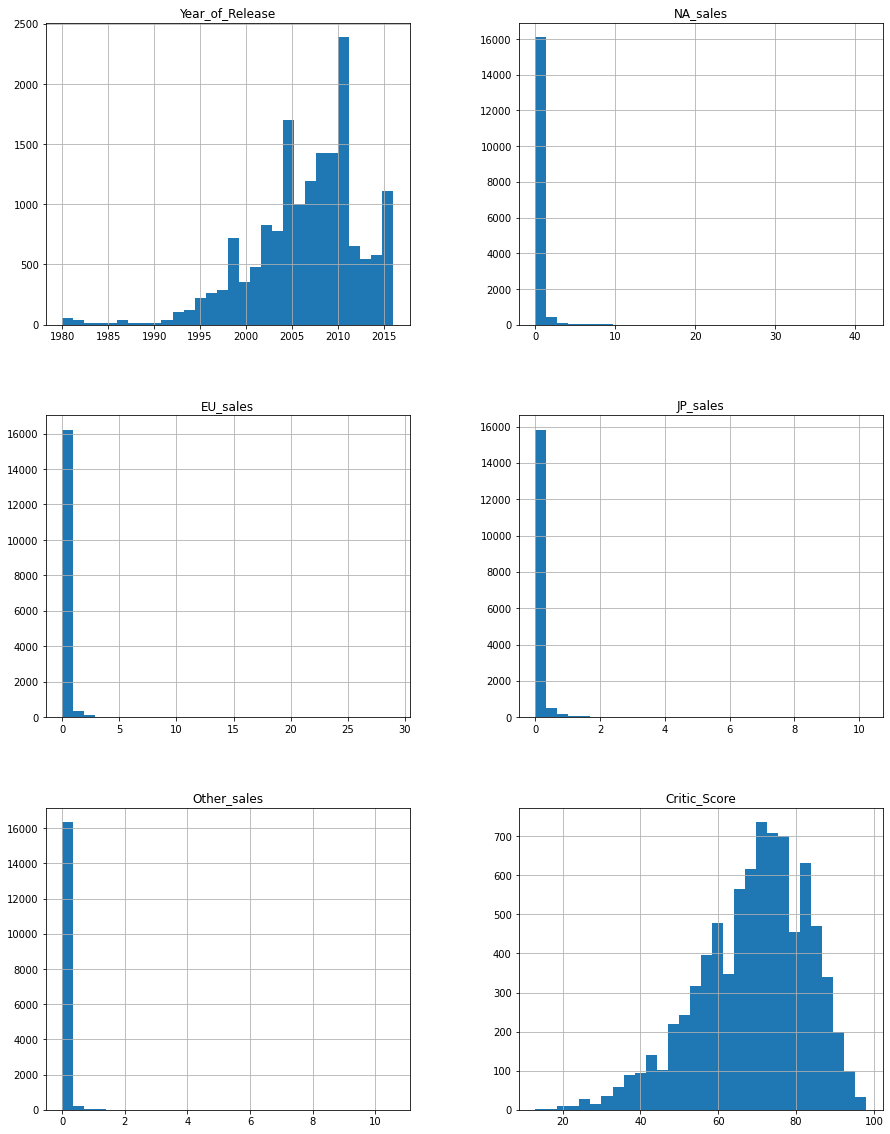

In [35]:
data.hist(figsize=(15, 20), bins=30)

**Выводы:** 
1. Датасет содержит 16715 записей. 
2. Имеются следующие данные об играх: название (`'Name'`), платформа (`'Platform'`), год выпуска (`'Year_of_Release'`), жанр (`'Genre'`), число продаж в разных регионах (`'NA_sales'`, `'EU_sales'`, `'JP_sales'`, `'Other_sales'`), оценка критиков (`'Critic_Score'`), оценка пользователей (`'User_Score'`), рейтинг ESRB (`'Rating'`).
3. В данных имеются пропуски. Столбцы `'Name'`, `'Year_of_Release'` и `'Genre'` содержат небольшое количество пропусков. В столбцах `'Critic_Score'`, `'User_Score'` и `'Rating'` доля пропусков велика. 
4. Некоторые столбцы имеют некорректный тип данных: `'Year_of_Release'` - тип float, `'User_Score'` - тип object. Тип данных в этих столбцах следует изменить.
5. До 1990-х годов выпускалось мало компьютерных игр.
6. Очень упрощая данные, можно предварительно судить, что в Северной Америке и Европе было продано больше копий игр, чем в Японии и других странах.
7. Распределение оценок критиков похоже на нормальное, но датасет скошен влево.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [36]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем типы данных

Поменяем тип данных в столбце `'year_of_release'` на целочисленный, т.к. год не может представлять собой дробное число. Невозможно изменить на целочисленный тип данных в столбце, содержащем пропуски. Посчитаем долю пропусков в столбце `'year_of_release'`. Если их немного, устраним пропуски, после чего поменяем тип данных.

In [37]:
data['year_of_release'].isna().sum()/ len(data['year_of_release']) # доля пропусков

0.01609332934489979

Доля пропусков в столбце `'year_of_release'` составляет менее 2%, их можно безболезненно удалить, после чего можно поменять тип данных.

In [38]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int')

Поменяем тип данных в столбце `'user_score'` на числовой (float), т.е. на тот же тип, что и в столбце `'critic_score'`.  В первую очередь рассмотрим уникальные значения в столбце. 

In [39]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо числовых и пустых значений в столбце `'user_score'` есть значение `'tbd'` **(англ. *to be determined/decided/declared* "подлежит уточнению")**, заменим его пропусками, после чего поменяем тип данных.

In [40]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Проверим результат

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Обработаем пропуски

Применение метода `info()` выше показывает, что столбцы `'name'` и `'genre'` содержат всего по два пропуска, их можно безболезненно удалить

In [42]:
data=data.dropna(subset=['name', 'genre']).reset_index(drop=True)

Столбцы `'critic_score'`, `'user_score'` и `'rating'` содержат значительное число пропусков, однако заполнить их, исходя из имеющихся данных, невозможно. Поскольку признак `'rating'` – категориальный, можем заполнить пропуски в нем, введя еще одну категорию – "без рейтинга", или `'unrated'`. Сделаем это после анализа причин появления пропусков. Следует также напомнить, что часть пропусков в столбце `'user_score'` - результат замены значения `'tbd'` ("подлежит уточнению"). Попробуем понять, есть ли какие-то закономерности появления пропусков в данных.

In [43]:
print("Пропусков в столбце 'critic_score':", len(data[data['critic_score'].isna()]))
print("Пропусков в столбце 'user_score':", len(data[data['user_score'].isna()]))
print("Пропусков в столбце 'rating':", len(data[data['rating'].isna()]))
print("Пропусков в трех столбцах сразу:", len(data[data['critic_score'].isna() &
                                                  data['user_score'].isna() &
                                                  data['rating'].isna()]))
display(len(data[data['critic_score'].isna() &
         data['user_score'].isna() &
         data['rating'].isna()])/len(data[data['rating'].isna()]))
display(len(data[data['critic_score'].isna() &
         data['user_score'].isna() &
         data['rating'].isna()])/len(data[data['critic_score'].isna()]))
len(data[data['critic_score'].isna() &
         data['user_score'].isna() &
         data['rating'].isna()])/len(data[data['user_score'].isna()])

Пропусков в столбце 'critic_score': 8461
Пропусков в столбце 'user_score': 8981
Пропусков в столбце 'rating': 6676
Пропусков в трех столбцах сразу: 6580


0.9856201318154584

0.7776858527360833

0.7326578332034295

В 98,6% случаев наличия пропусков в столбце `'rating'`, значения также пропущены в столбцах `'user_score'` и `'critic_score'`, слишком большое совпадение, чтобы быть случайным. Посмотрим для этого среза распределение по годам.

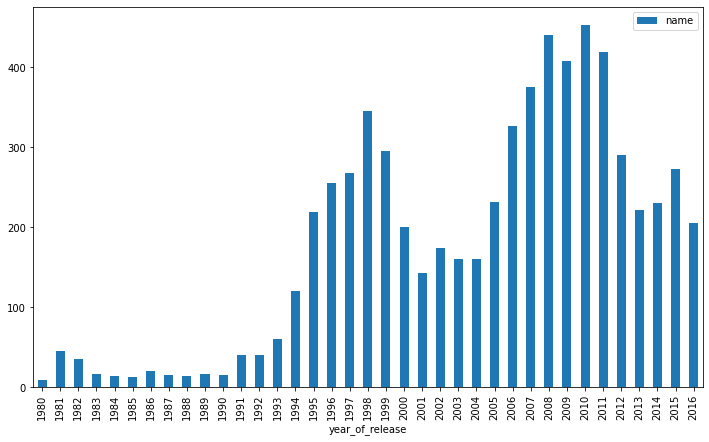

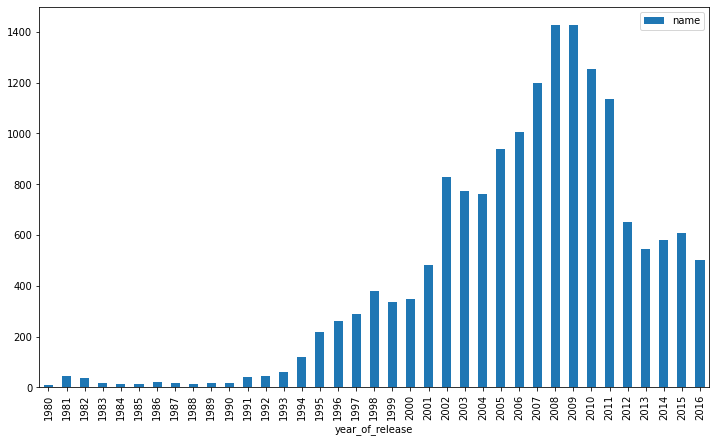

In [44]:
na_data = data[data['critic_score'].isna() &
         data['user_score'].isna() &
         data['rating'].isna()]
na_data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',
                                                                                 figsize=(12, 7))
plt.show()

data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',
                                                                               figsize=(12, 7))
plt.show()

Непохоже, что пропуски значений сильно связаны с годом выпуска. По сравнению с общей картиной наблюдается повышенное количество пропусков в период примерно с 1994 по 2000 год.

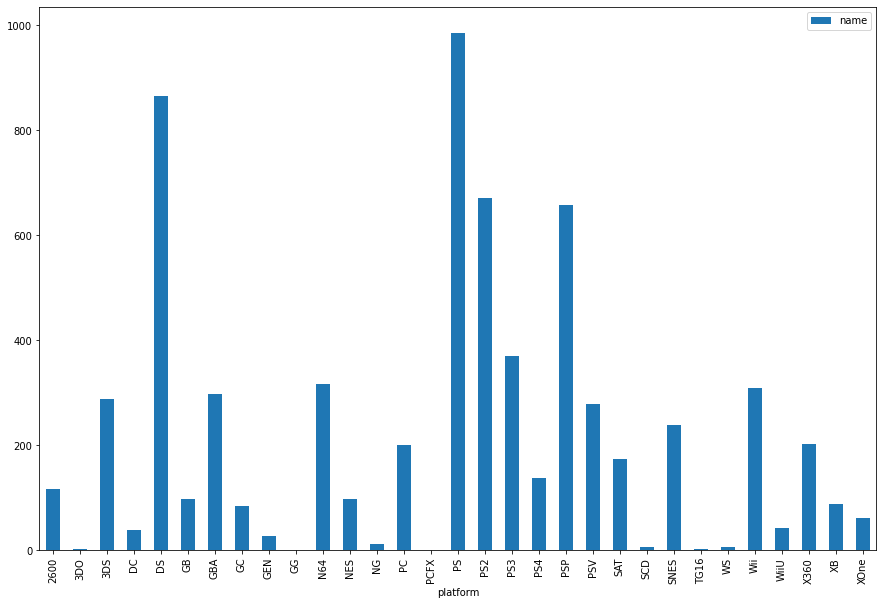

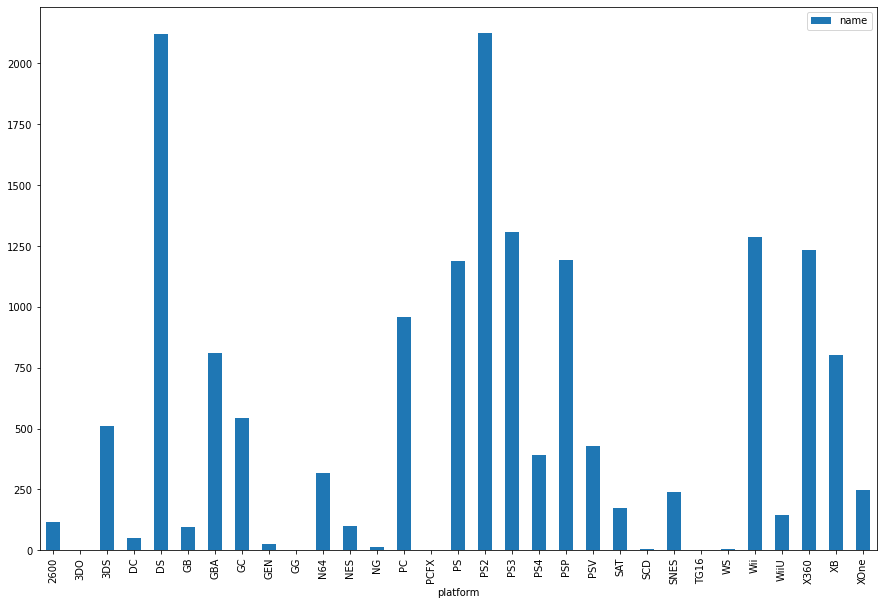

In [45]:
data_rating_isna = data[data['rating'].isna()]
data_rating_isna.pivot_table(index='platform', 
                             values='name', 
                             aggfunc='count').plot(kind='bar', figsize=(15,10))
plt.show()
data.pivot_table(index='platform', 
                             values='name', 
                             aggfunc='count').plot(kind='bar', figsize=(15,10))
plt.show()

Похоже, наличие пропусков в столбце `'rating'` не зависит или мало зависит от платформы.

In [46]:
display(data_rating_isna[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe())
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,6676.000000,6676.000000,6676.000000,6676.000000
mean,0.183619,0.091320,0.125336,0.022449
std,0.800182,0.349929,0.385235,0.092573
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.020000,0.000000
75%,0.120000,0.050000,0.100000,0.010000
max,29.080000,10.950000,10.220000,2.740000


,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


В целом уровни продаж для игр с пропусками в столбце `'rating'` несколько ниже, чем по всему датасету в целом.

Заменим пропуски в столбце `'rating'` на `'unrated'` (без рейтинга).

In [47]:
data['rating'] = data['rating'].fillna('unrated')

Проверим результат, вызвав метод `info()`

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Проверим данные на  дубликаты

In [49]:
data.duplicated().sum()

0

Явных дубликатов нет. 

Неявные случаи: есть ли случаи совпадения по одновременно по параметрам `'name'`, `'year_of_release'`, `'platform'`? Да, такой случай один. Проверка показывает, что с большой долей вероятности это одна игра.

In [50]:
display(data.duplicated(['name', 'year_of_release', 'platform']).sum())
display(data[data.duplicated(['name', 'year_of_release', 'platform'])])
data[(data['platform'] == 'PS3') & (data['name'] == 'Madden NFL 13')]

1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [51]:
data = data.drop(index=[15969]).reset_index(drop=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Посчитаем суммарные продажи по всем регионам и добавим в отдельный столбец

In [53]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


**Выводы:** в ходе подготовки данных было сделано следующее:
* названия столбцов были приведены к нижнему регистру;
* преобразован тип данных в столбцах `'year_of_release'` и `'user_score'` (при этом значение `'tbd'` было заменено на пропуски);
* обработаны пропуски (при этом выявлено, что пропуски в столбцах `'critic_score'`, `'user_score'` и `'rating'`, как правило, присутствуют для одних и тех же игр, также отмечен несколько более низкий уровень продаж игр с пропусками в столбце `'rating'` по сравнению с показателями по датасету в целом), пропуски и `'rating'` заменены на `'unrated'`;
* был выявлен и удален один неявный дубликат;
* добавлен столбец, в котором посчитаны суммарные продажи.

##  Исследовательский анализ данных

**Задания:**
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим, сколько игр выпускалось в разные годы

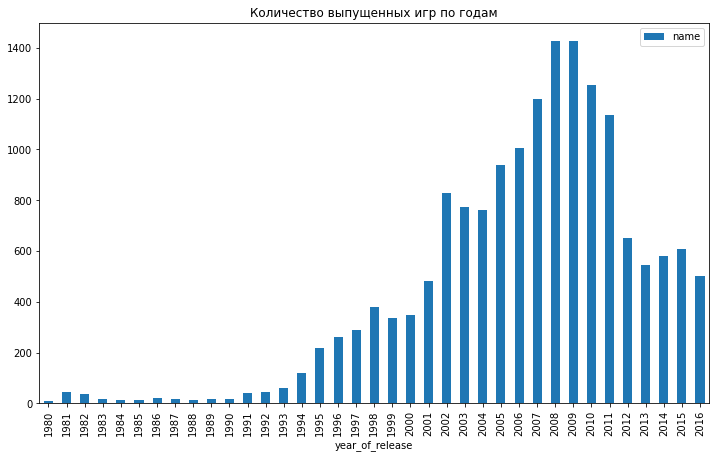

In [54]:
data.pivot_table(index='year_of_release', 
                 values='name', 
                 aggfunc='count').plot(kind='bar',
                                       figsize=(12,7),
                                       title='Количество выпущенных игр по годам');

До 1994 года выпускалось мало игр. Посчитаем их долю среди всех игр в датасете. 

In [55]:
display(len(data[data['year_of_release'] < 1993]))
display(len(data[data['year_of_release'] < 1993])/len(data))

305

0.018548926594903606

До 1994 года было выпущено 305 игр, их доля составляет около 1.9%. Можно считать, что данные за период до 1994 года не важны.

In [56]:
data = data.query('year_of_release >= 1994').reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16078 entries, 0 to 16077
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16078 non-null  int64  
 1   name             16078 non-null  object 
 2   platform         16078 non-null  object 
 3   year_of_release  16078 non-null  int64  
 4   genre            16078 non-null  object 
 5   na_sales         16078 non-null  float64
 6   eu_sales         16078 non-null  float64
 7   jp_sales         16078 non-null  float64
 8   other_sales      16078 non-null  float64
 9   critic_score     7979 non-null   float64
 10  user_score       7459 non-null   float64
 11  rating           16078 non-null  object 
 12  total_sales      16078 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.6+ MB


### Посмотрим, как менялись продажи по платформам. 

Посмотрим количество игр на каждой платформе и определим, какие платформы лидируют по количеству игр и суммарным продажам. Можно видеть большой разброс значений для разных платформ.

In [57]:
platforms_pivot = data.pivot_table(index = 'platform', 
                                values = 'total_sales',
                                aggfunc=['count', 'sum'])
platforms_pivot.columns = ['count', 'sum']
platforms_pivot.sort_values('sum', ascending=False)


,count,sum
platform,,
PS2,2127,1233.56
X360,1232,961.24
PS3,1305,931.33
Wii,1286,891.18
DS,2120,802.76
PS,1190,727.58
PS4,392,314.14
GBA,811,312.88
PSP,1193,289.53


Выберем платформы с наибольшими суммарными продажами. Согласно сводной таблице, для шести платформ наблюдаются суммарные продажи более 700 млн: PlayStation 2 (PS2), Xbox 360 (X360), PlayStation 3 (PS3), Wii, Nintendo DS (DS), PlayStation (PS). Для этих платформ построим распределение по годам.

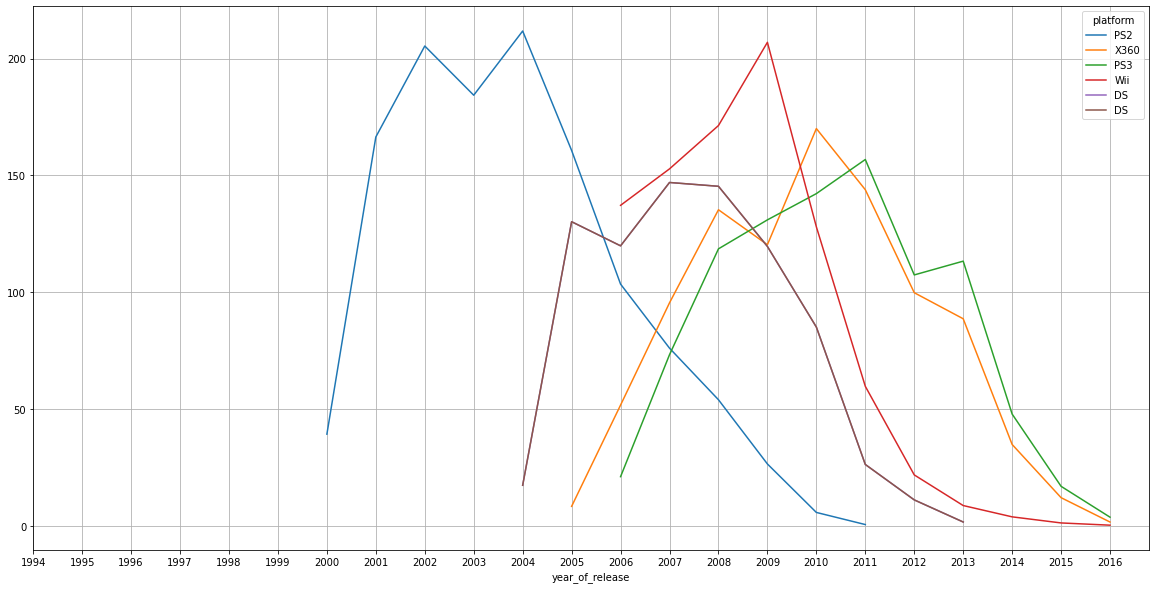

11.0

In [58]:
sales_per_year_pivot = data.pivot_table(index = 'year_of_release', 
                                        columns = 'platform', 
                                        values = 'total_sales', 
                                        aggfunc = 'sum')

# распределение по годам для платформ с наибольшими суммарными продажами
sales_per_year_pivot[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'DS']].plot(xticks=sales_per_year_pivot.index, 
                                                                     grid=True, figsize=(20, 10))
plt.show()

# средний срок существования платформы
sales_per_year_pivot[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'DS']].count().mean()

График показывает, что время платформы имеют ограниченный срок существования. Все шесть платформ к 2016 году либо прекратили свое существование, либо достигли минимума продаж. На примере платформ с максимальными суммарными продажами можно сделать вывод, что среднее время существования платформы - 11 лет, при этом в первую половину этого периода наблюдается рост, а во вторую - снижение суммы продаж.

### Определим актуальный период 

Актуальными являются данные за последние 2-3 года. Поскольку в условии сказано, что данные за 2016 год могут быть неполными, возьмем период в 3 года. Таким образом, далее будем рассматривать данные за 2014-2016 гг.

In [59]:
actual_data = data.query('2014 <= year_of_release <= 2016').reset_index(drop=True).drop(columns='index')
display(actual_data['name'].count())
actual_data['platform'].value_counts()

1689

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

За выбранный актуальный период появилась 1689 игра на 10 платформах.

### Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ

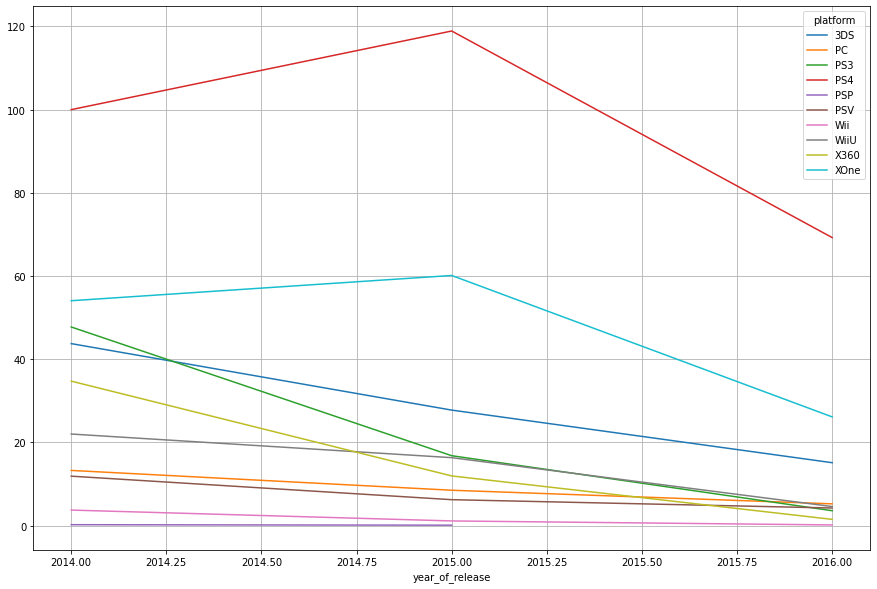

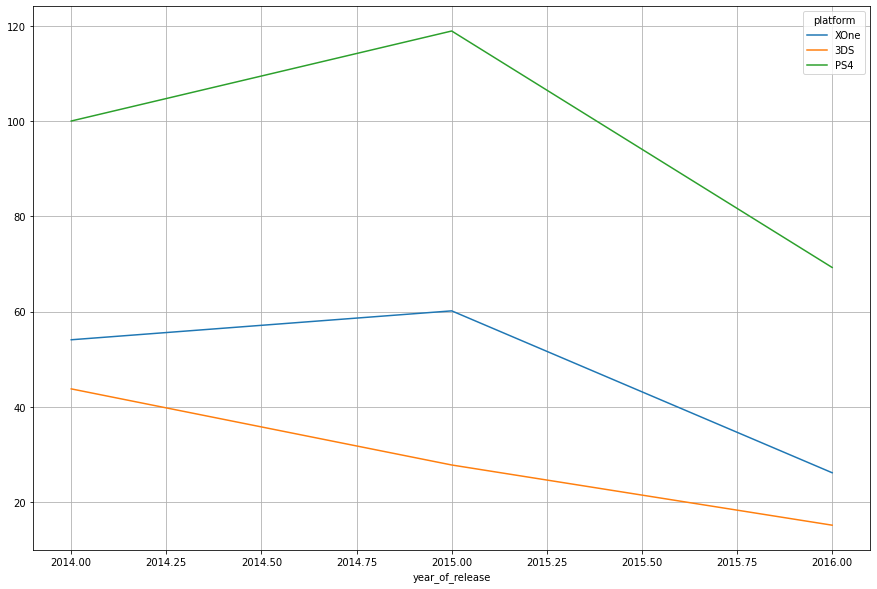

In [60]:
actual_sales_per_year_pivot = actual_data.pivot_table(index = 'year_of_release', 
                                        columns = 'platform', 
                                        values = 'total_sales', 
                                        aggfunc = 'sum')

actual_sales_per_year_pivot.plot(grid=True, figsize=(15, 10))
plt.show()

actual_sales_per_year_pivot[['XOne', '3DS', 'PS4']].plot(grid=True, figsize=(15, 10))
plt.show()

График показывает, что все рассматриваемые платформы к 2016 году либо прекратили свое существование, либо демонстрируют спад продаж. Если делать прогнозы на 2017 год, то для трех платформ: XOne, PS4 и (в меньшей степени) 3DS - ожидаются наиболее высокие уровни продаж. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

В первую очередь вызовем описание данных о глобальных продажах игр по платформам за актуальный период (сгруппируем данные по платформам и вызовем метод `describe()` для столбца `'total_sales'`).

In [61]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

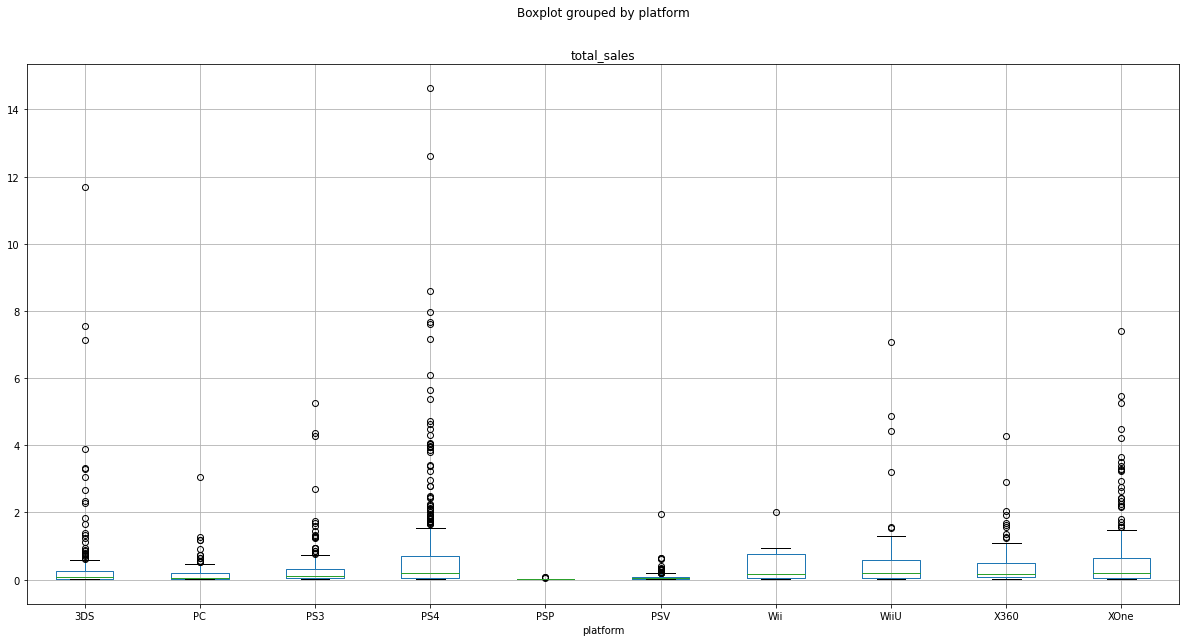

In [62]:
actual_data.boxplot('total_sales', 'platform', figsize=(20,10))


График выше показывают в основном выбросы. Посмотрим, как будет выглядеть график, если не показывать выбросы.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

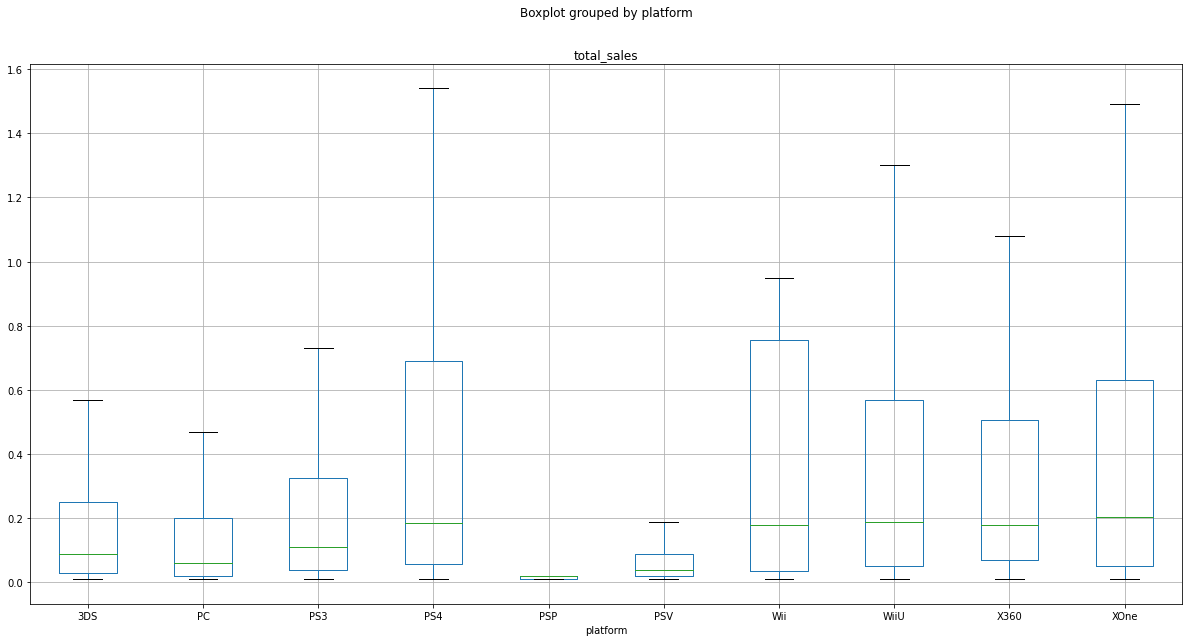

In [63]:
actual_data.boxplot('total_sales', 'platform', figsize=(20,10), showfliers=False)

Описание данных и диаграммы размаха позволяют сделать ряд наблюдений.
1) Игры на платформах PSP, PSV показывают в среднем низкие суммы продаж.
2) Наиболее высокие показатели глобальных продаж показывают игры на платформах PS4, Wii, WiiU, X360, XOne.
3) В данных (особенно по продажам игр на "популярных" платформах) присутствует большое количество выбросов: игр с более высокими показателями продаж, чем в среднем по платформе. Можно предположить, что именно игры с необычно высокими показателями глобальных продаж во многом определяют суммарные показатели продаж по платформам.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.  Сравнение с другими платформами

Возьмем наиболее "перспективную" на 2017 год платформу PS4 и определим, влияют ли отзывы пользователей и критиков на продажи. 

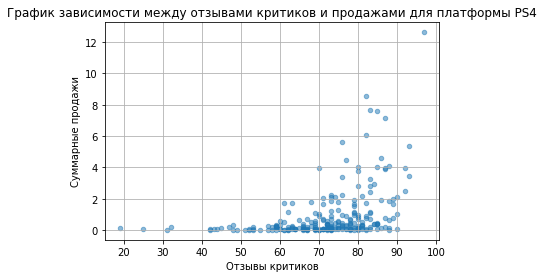

Коэффициент корреляции между отзывами критиков и продажами для платформы PS4: 0.40656790206178095


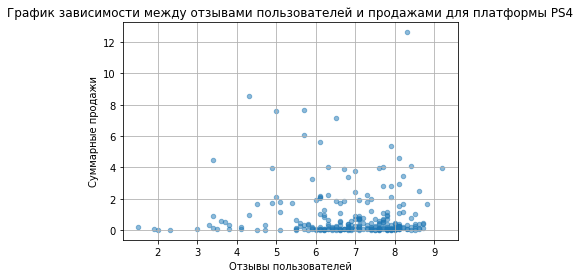

Коэффициент корреляции между отзывами пользователей и продажами для платформы PS4: -0.031957110204556376


In [64]:
# напишем функцию, показывающую зависимость между продажами и отзывами 
# (диаграмма рассеяния)
def correlation(platform):
    # влияние отзывов критиков на продажи
    actual_data[(actual_data['platform'] == platform) & 
            (actual_data['critic_score'].notna())].plot(x='critic_score', 
                                                        y='total_sales',
                                                        xlabel = 'Отзывы критиков',
                                                        ylabel = 'Суммарные продажи',
                                                        kind='scatter',
                                                        alpha=0.5,
                                                        grid=True,
                                                        title=f'График зависимости между отзывами критиков и продажами для платформы {platform}')
    
    
    plt.show()
    data_platform = data[data['platform']==platform]
    print(f"Коэффициент корреляции между отзывами критиков и продажами для платформы {platform}: {data_platform['critic_score'].corr(data_platform['total_sales'])}")
    # влияние отзывов пользователей на продажи
    actual_data[(actual_data['platform'] == platform) & 
            (actual_data['user_score'].notna())].plot(x='user_score',
                                                      y='total_sales',
                                                      xlabel = 'Отзывы пользователей',
                                                      ylabel = 'Суммарные продажи',
                                                      kind='scatter', 
                                                      alpha=0.5, 
                                                      grid=True,
                                                      title=f'График зависимости между отзывами пользователей и продажами для платформы {platform}')
    plt.show()
    print(f"Коэффициент корреляции между отзывами пользователей и продажами для платформы {platform}: {data_platform['user_score'].corr(data_platform['total_sales'])}")


# применим функцию correlation к данным по платформе PS4
correlation('PS4')

Между отзывами критиков и продажами на платформе PS4 наблюдается умеренная (по шкале Чеддока) положительная корреляция, между отзывами пользователей и продажами корреляции не наблюдается.

**Сравним с данными по другим популярным платформам: PS3, WiiU, X360, XOne.**

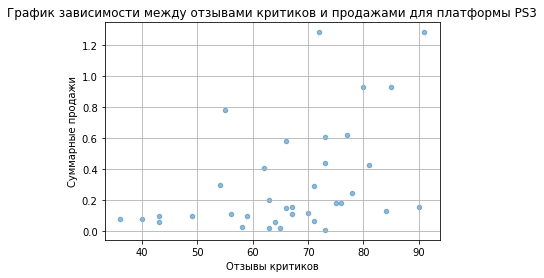

Коэффициент корреляции между отзывами критиков и продажами для платформы PS3: 0.43371246722331125


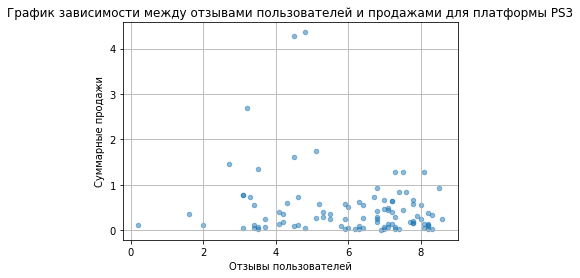

Коэффициент корреляции между отзывами пользователей и продажами для платформы PS3: 0.12792603540158226


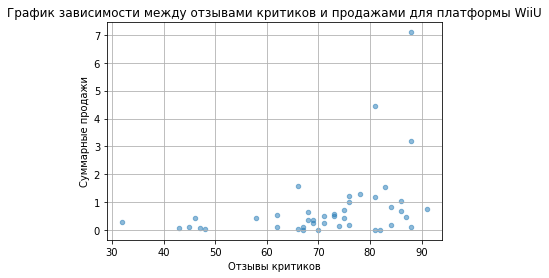

Коэффициент корреляции между отзывами критиков и продажами для платформы WiiU: 0.34837976012017485


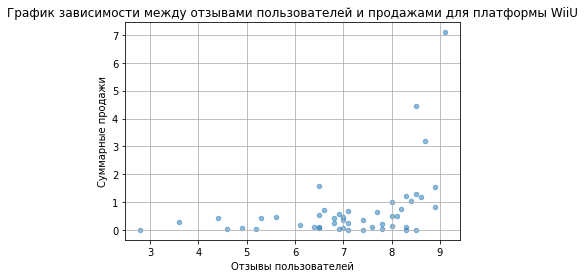

Коэффициент корреляции между отзывами пользователей и продажами для платформы WiiU: 0.4002190202148617


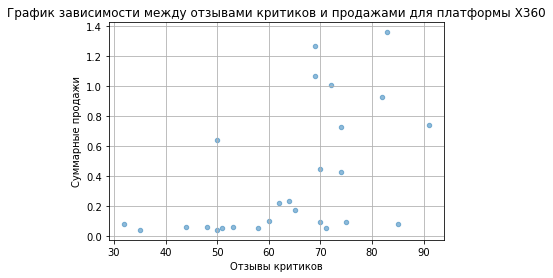

Коэффициент корреляции между отзывами критиков и продажами для платформы X360: 0.39286589254006954


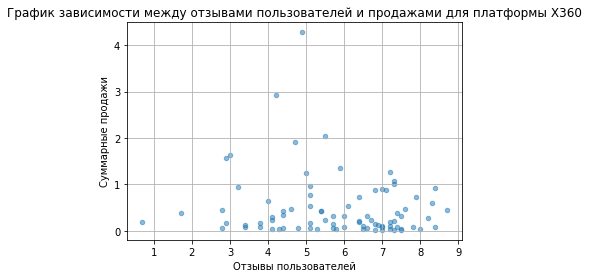

Коэффициент корреляции между отзывами пользователей и продажами для платформы X360: 0.11418661214018049


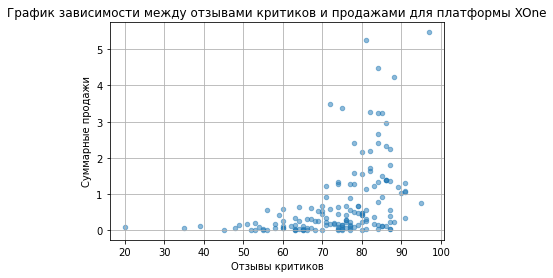

Коэффициент корреляции между отзывами критиков и продажами для платформы XOne: 0.4169983280084017


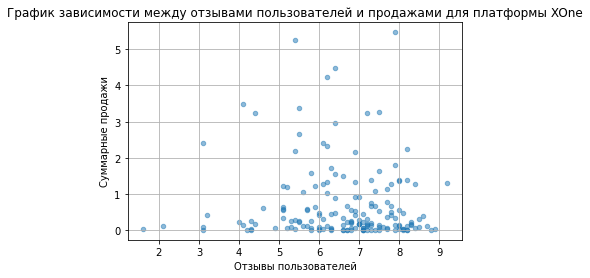

Коэффициент корреляции между отзывами пользователей и продажами для платформы XOne: -0.06892505328279414


In [65]:
for platform in ['PS3', 'WiiU', 'X360', 'XOne']:
    correlation(platform)

Также можно привести данные о связи продаж с отзывами критивов и пользователей по данным за актуальный период в целом (без привязки к платформе).

In [66]:
display(actual_data['critic_score'].corr(actual_data['total_sales']))
actual_data['user_score'].corr(actual_data['total_sales'])

0.328105086966363

-0.013070305002484585

Можно сделать вывод, что существует умеренная положительная корреляция между отзывами критиков и продажами, в то время как между отзывами пользователей и продажами связи нет или она слабая (исключение - платформа WiiU с уровнем корреляции между отзывами пользователей и продажами, равным 0.4).

### Общее распределение игр по жанрам

In [67]:
actual_data['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [68]:
genres_pivot = actual_data.pivot_table(index='genre', 
                        values='total_sales', 
                        aggfunc=['count', 'sum', 'mean', 'median'])
genres_pivot.columns = ['count', 'sum', 'mean', 'median']
genres_pivot.sort_values('count', ascending=False)

,count,sum,mean,median
genre,,,,
Action,619,199.36,0.322068,0.090
Role-Playing,221,101.44,0.459005,0.110
Adventure,185,17.55,0.094865,0.030
Sports,161,109.48,0.680000,0.180
Shooter,128,170.94,1.335469,0.515
Misc,113,37.55,0.332301,0.090
Racing,69,27.52,0.398841,0.090
Fighting,60,28.22,0.470333,0.125
Simulation,44,13.13,0.298409,0.100


array([<AxesSubplot:ylabel='count'>], dtype=object)

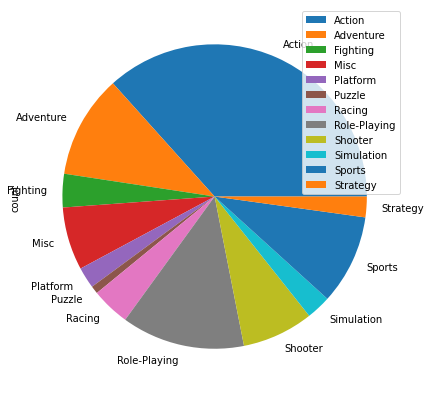

In [69]:
genres_pivot.plot(y='count',
                  kind='pie', 
                  grid=True, 
                  figsize=(12,7),
                  subplots=True)

По количеству больше всего игр жанра Action, далее можно выделить такие жанры как Adventure,  Misc, Role-Playing, Shooter и Sports. Остальные жанры представлены наименьшим количеством игр.

array([<AxesSubplot:ylabel='sum'>], dtype=object)

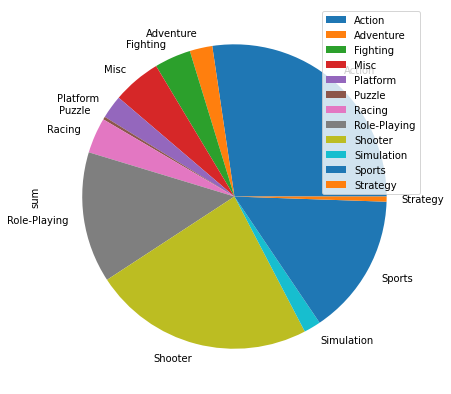

In [70]:
genres_pivot.plot(y='sum',
                  kind='pie', 
                  grid=True, 
                  figsize=(12,7),
                  subplots=True)

По сумме глобальных продаж первое место занимают игры жанра Action, далее следуют игры жанров Shooter, Role-Playing и Sports. Игры остальных жанров приносят меньше прибыли по глобальным продажам.

array([<AxesSubplot:title={'center':'median'}, xlabel='genre'>],
      dtype=object)

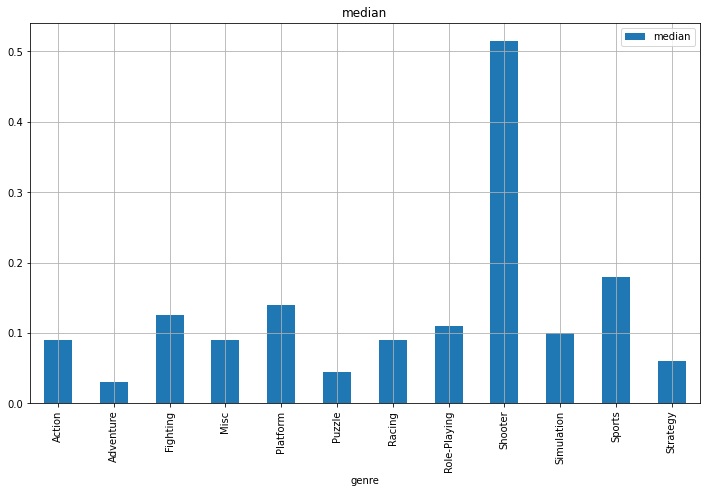

In [71]:
genres_pivot.plot(y='median',
                  kind='bar', 
                  grid=True, 
                  figsize=(12,7),
                  subplots=True)

Средние показатели продаж выше всего для игр жанра Shooter. Наиболее низкие показатели продаж в среднем наблюдаются для игр жанров Puzzle и Adventure.

**Выводы:** 
* В период до 1994 года было выпущено менее 2% игр, попавшив в выборку.
* Анализ динамики продаж по годам показывает, что средний срок существования - 11 лет.
* На основании предыдущего наблюдения актуальный период был определен сроком 3 года.
* Определены наиболее перспективные платформы на 2017 год: Xbox One, PlayStation 4 и (в меньшей степени) Nintendo 3DS.
* Наиболее популярными за актуальный период являются платформы PlayStation 3, PlayStation 4,  Nintendo Wii, Nintendo Wii U, Xbox 360, Xbox One.
* Отзывы критиков оказывают умеренное влияние на уровни продаж, в то время как отзывы пользователей на продажи не влияют.
* Было проанализировано общее распределение по жанрам. Выявлено, что больше всего выпускается игр жанра Action, также игры этого жанра занимают первое место по суммарным продажам. При этом средние показатели продаж выше всего для игр жанра Shooter.

## Составим портрет пользователя каждого региона

### Cамые популярные платформы

Определим для каждого региона самые популярные платформы, посчитав доли продаж по каждой платформе за принятый актуальный период (2011-2016гг.)

,eu_sales,jp_sales,na_sales,eu_sales_ratio,jp_sales_ratio,na_sales_ratio
platform,,,,,,
3DS,16.12,44.24,22.64,0.059554,0.475239,0.079701
PC,17.97,0.00,7.23,0.066388,0.000000,0.025452
PS3,25.54,11.22,22.05,0.094355,0.120529,0.077624
PS4,130.04,15.02,98.61,0.480420,0.161349,0.347145
PSP,0.00,0.36,0.00,0.000000,0.003867,0.000000
PSV,3.53,14.54,2.52,0.013041,0.156193,0.008871
Wii,2.59,0.00,2.08,0.009568,0.000000,0.007322
WiiU,13.15,7.31,19.36,0.048581,0.078526,0.068155
X360,15.49,0.08,28.30,0.057226,0.000859,0.099627


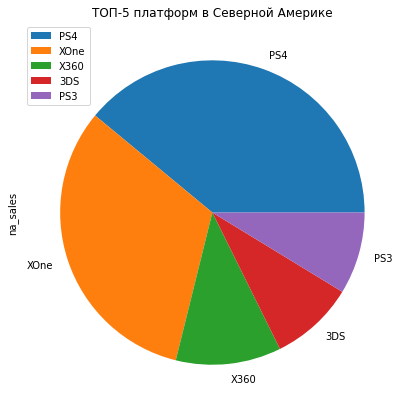

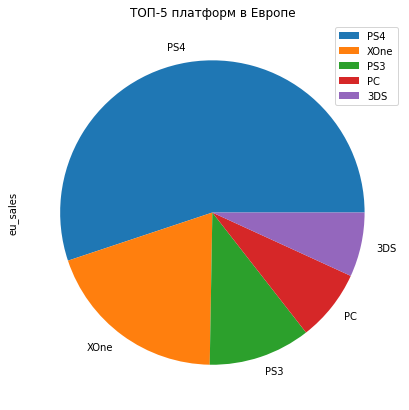

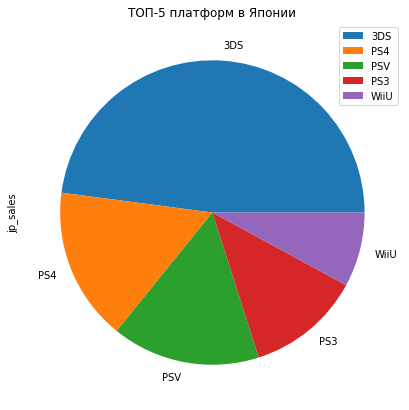

In [72]:
region_sales_per_platform = actual_data.pivot_table(index='platform',
                      values=['eu_sales','na_sales', 'jp_sales'],
                      aggfunc='sum')
region_sales_per_platform[['eu_sales_ratio', 'jp_sales_ratio', 'na_sales_ratio']] = (
    region_sales_per_platform[['eu_sales', 'jp_sales', 'na_sales']]/
    region_sales_per_platform[['eu_sales', 'jp_sales', 'na_sales']].sum()
)
display(region_sales_per_platform)

region_sales_per_platform.sort_values('na_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='na_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 платформ в Северной Америке')
plt.show()
region_sales_per_platform.sort_values('eu_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='eu_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 платформ в Европе')
plt.show()
region_sales_per_platform.sort_values('jp_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='jp_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 платформ в Японии')
plt.show()

Можно заметить, что список наиболее популярных платформ в Северной Америке совпадает (3 из 5 пунктов: PS3, PS4, 3DS, XOne), в то время как в Японии в ТОП-5 попадает относительно непопулярная в других регионах PSV, но не входят популярная в Америке и Европе XOne. 

### Самые популярные жанры

Аналогичным образом определим самые популярные жанры для каждого региона.

,eu_sales,jp_sales,na_sales,eu_sales_ratio,jp_sales_ratio,na_sales_ratio
genre,,,,,,
Action,74.68,29.58,72.53,0.275898,0.317757,0.255333
Adventure,6.49,3.60,5.64,0.023977,0.038672,0.019855
Fighting,6.69,6.37,12.43,0.024716,0.068428,0.043758
Misc,12.86,5.61,15.05,0.047510,0.060264,0.052982
Platform,6.80,2.69,6.79,0.025122,0.028897,0.023903
Puzzle,0.52,0.93,0.65,0.001921,0.009990,0.002288
Racing,14.13,1.76,8.74,0.052202,0.018906,0.030768
Role-Playing,28.17,31.16,33.47,0.104071,0.334730,0.117827
Shooter,65.52,4.87,79.02,0.242057,0.052315,0.278181


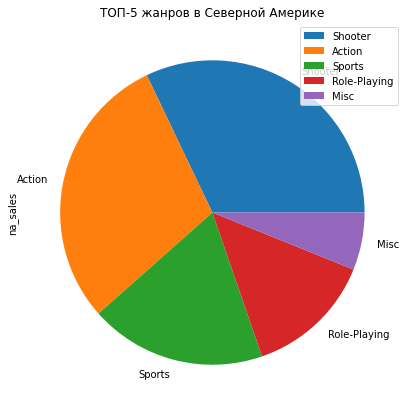

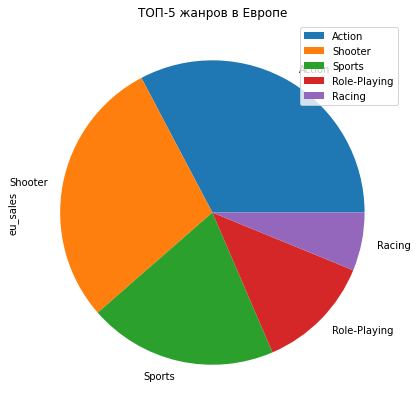

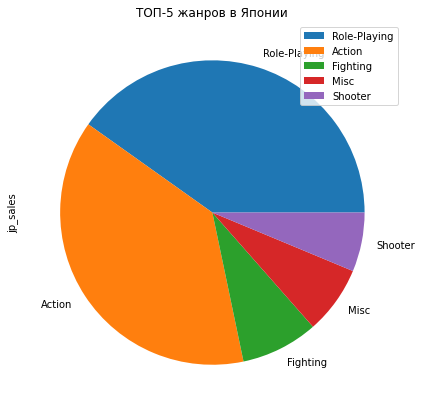

In [73]:
region_sales_per_genre = actual_data.pivot_table(index='genre',
                      values=['eu_sales','na_sales', 'jp_sales'],
                      aggfunc='sum')

region_sales_per_genre[['eu_sales_ratio', 'jp_sales_ratio', 'na_sales_ratio']] = (
    region_sales_per_genre[['eu_sales', 'jp_sales', 'na_sales']]/
    region_sales_per_genre[['eu_sales', 'jp_sales', 'na_sales']].sum()
)
display(region_sales_per_genre)

region_sales_per_genre.sort_values('na_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='na_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 жанров в Северной Америке')
plt.show()
region_sales_per_genre.sort_values('eu_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='eu_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 жанров в Европе')
plt.show()
region_sales_per_genre.sort_values('jp_sales', ascending=False).head().plot(kind='pie', 
                                                                               y='jp_sales',
                                                                               figsize=(12,7),
                                                                               title='ТОП-5 жанров в Японии')
plt.show()

ТОП-5 жанров игр в Северной Америке и Европе включают 4 совпадающих позиции, почти одинаковым образом распределенных по популярности: 1-2. Action ("экшн") и Shooter ("стрелялки"), 3. Sports ("спортивные", напр. футбол), 4. Role-Playing (ролевые). На пятой позиции в Северной Америке находится жанр Misc ("miscelaneous" - "разное"), а в Европе - Racing (гонки). Для Японии ТОП-5 жанров оказывается иным: 1. Role-Playing (ролевые), 2. Action ("экшн"), 3. Fighting ("борьба"), 4. Misc ("miscelaneous"), 5. Platform ("платформер" - жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня). Как и в случае с наиболее популярными платформами, обращает на себя внимание существенное отличие предпочтений в Японии от таковых в Европе и Америке.

### Рейтинг ESRB и продажи по регионам

Рассмотрим, какие значения рейтинга ESRB есть в данных за актуальный период.

In [74]:
actual_data['rating'].unique()

array(['unrated', 'M', 'E', 'T', 'E10+'], dtype=object)

**Пояснение:**
* "E" («Everyone») — «Для всех». Содержание подходит для всех возрастов.
* «EC» («Early childhood») — «Для детей младшего возраста». Игры подходят для детей от 3 лет, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам». Игра подходит для лиц от 13 лет. 
* «M» («Mature») — «Для взрослых». Игры не подходят для лиц младше 17 лет. 

Расссмотрим данные о продажах в каждом отдельном регионе в зависимости от рейтинга ESRB.

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unrated,58.95,56.90,64.72


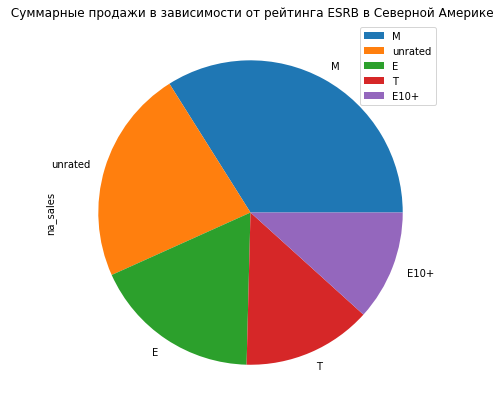

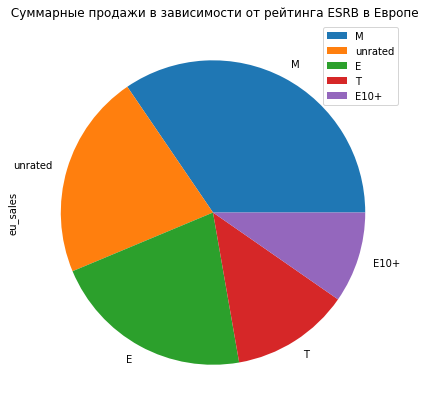

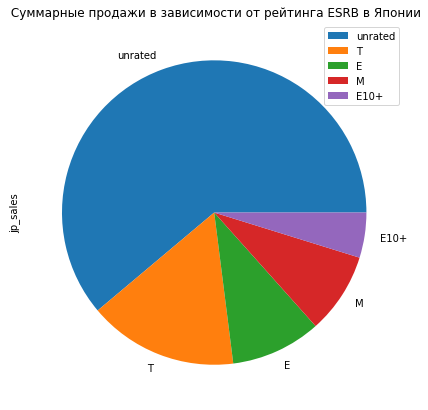

In [75]:
region_sales_per_rating = actual_data.pivot_table(index='rating',
                      values=['eu_sales','na_sales', 'jp_sales'],
                      aggfunc='sum')

display(region_sales_per_rating)

region_sales_per_rating.sort_values('na_sales', ascending=False).plot(kind='pie', 
                                                                      y='na_sales',
                                                                      figsize=(12,7),
                                title=' Суммарные продажи в зависимости от рейтинга ESRB в Северной Америке')
plt.show()

region_sales_per_rating.sort_values('eu_sales', ascending=False).plot(kind='pie', 
                                                                      y='eu_sales',
                                                                      figsize=(12,7),
                                title=' Суммарные продажи в зависимости от рейтинга ESRB в Европе')
plt.show()

region_sales_per_rating.sort_values('jp_sales', ascending=False).plot(kind='pie',
                                                                      y='jp_sales',
                                                                      figsize=(12,7),
                                title=' Суммарные продажи в зависимости от рейтинга ESRB в Японии')
plt.show()

В Европе и Северной Америке наиболее популярны игры для взрослых ("M"), далее следуют игры без возрастных ограничений, подходящие как для детей, так и для взрослых, примерно одинаковой популярностью игры с ограничением 10+ (для всех старше 10 лет) и 13+ (для подростков). Можно сделать вывод, что рынок компьютерных игр в Европе и Северной Америке в основном настроен на взрослую аудиторию. Иная картина в Японии: наибольшие суммарные продажи наблюдаются для игр с рейтингом "Е" ("для всех") и "T" ("для подростков"), далее идут для взрослых, на четвертом месте находятся игры с рейтингом E10+. За актуальный период не выпускались игры, предназначенные для детей младшего возраста. Отдельно следует отметить игры введенной нами выше категории "unrated": в Северной Америке и Европе на игры без рейтинга приходится менее четверти продаж (второе место в ТОП-5), в то время как в Японии - более половины (первое место в ТОП-5).

**Выводы:**
Портреты пользователей компьютерных игр в Европе и Северной Америке во многом совпадают: пользователи из этих регионов отдают предпочтение одним и тем же платформам и жанрам, при этом рынок компьютерных игр в этих регионах скорее ориентирован на взрослую аудиторию. Портрет пользователя из Японии значительно отличается от европейского или американского: средний пользователь из Японии младше и выбирает другие платформы и жанры.

## Проверка гипотез

Проверим две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

### Пользовательские рейтинги платформ Xbox One и PC

Необходимо проверить гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Сформулируем нулевую (H0) и альтернативную гипотезы (H1):
* Н0: средние пользовательски рейтинги платформ Xbox One и PC одинаковы.
* Н1: средние пользовательски рейтинги платформ Xbox One и PC разные.

Для сравнения средних двух выборок используем t-тест.

Пороговый уровень значимости: α=0.05.

Выборки существенно различаются по размеру, поэтому указываем значение параметра `equal_var` как `False`.

In [76]:
# определяем выборки
xone = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notna())]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notna())]['user_score']

## определим размер выборок
print(xone.count(), pc.count())

alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

165 122
p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Таким образом, принимаем Н0: средние пользовательски рейтинги платформ Xbox One и PC одинаковы.

### Пользовательские рейтинги жанров Action и Sports разные.

Необходимо проверить гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".

Сформулируем нулевую (H0) и альтернативную гипотезы (H1):
* Н0: средние пользовательски рейтинги жанров Action и Sports одинаковы.
* Н1: средние пользовательски рейтинги жанров Action и Sports разные.

Для сравнения средних двух выборок используем t-тест.

Пороговый уровень значимости: α=0.05.

Выборки существенно различаются по размеру, поэтому указываем значение параметра `equal_var` как `False`.

In [77]:
# определяем выборки
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'].notna())]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].notna())]['user_score']

## определим размер выборок
print(action.count(), sports.count())

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

297 127
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Таким образом, принимаем Н1: средние пользовательски рейтинги жанров Action и Sports разные.

Можно также определить, для какого жанра средние пользовательский рейтинг выше. 

In [78]:
print ('Action', action.mean())
print ('Sports', sports.mean())

Action 6.760606060606061
Sports 5.2251968503937


**Вывод:** на основании данных за выбранный актуальный период при помощи t-теста для сравнения средних двух выборок были проверены две гипотезы.
* "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
* "Средние пользовательские рейтинги жанров Action и Sports разные".

Обе гипотезы подтверждаются.

## Общий вывод

Были рассмотрены  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с целью выявления закономерностей, определяющих успешность игры. Это позволит оценить перстективные продукты и спланировать рекламные кампании.
В ходе исследования были выполнены следующие действия:
* проведен обзор данных;
* выполнена предобработка данных (переименовоние столбцов, преобразование данных в нужные типы, заполнение пропусков, устранение дубликатов и т.д.);
* в таблицу добавлены данные, необходимые для дальнейшего исследования (данные о суммарных продажах);
* проведен исследовательский анализ данных (анализ данных по годам, платформам, влияние на продажи отзывов пользователей и критиков, отнесенности к определенным жанрам);
* составлен портрет пользователя каждого региона;
* проверен гипотезы (1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. средние пользовательские рейтинги жанров Action и Sports  разные).


**Приведем наиболее важные результаты исследования.**
* Средний срок существования платформы составляет 11 лет, при этом перспективными на 2017 год можно считать платформы, которые существуют меньше этого периода и к концу 2016 года не достигли минимума продаж: Xbox One, PlayStation 4 и (в меньшей степени) Nintendo 3DS.
* Отзывы критиков оказывают умеренное влияние на продажи, а отзывы пользователей не влияют на продажи.
* В целом наиболее популярным жанром является Action ("экшн"), при этом стативтический анализ показывает, что пользовательские оценки для этого жанра также выше (например, в сравнении с жанром Sports).
* Рынок компьютерных игр Северной Америки и Европы отличается от рынка Японии:
    * в Америке и Европе наиболее популярен жанр Action ("экшн"), в то время как в Японии более всего популярны RPG (Role-Playing Games, "ролевые игры");
    * в Европе и Северной Америке компьютерные игры более популярны среди взрослых, средний пользователь компьютерных игр младше, при этом в Японии больше половины продаж прижодится на игры без рейтинга.